# Problem Statement 

It is collection of  sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

### import library 

In [1]:
import numpy as np # it provides support for large, multi-dimensional arrays and matrices, as well as a large collection of mathematical functions to operate on these arrays.
import pandas as pd # it is data analysis and manipulation library for the Python Pandas provides many built-in functions for data manipulation, such as filtering, grouping, merging, and reshaping
import seaborn as sns
import matplotlib.pyplot as plt

### load DataSet

In [2]:
df=pd.read_csv("E:\\BigMart_Data\\archive (12)\\Train.csv")


In [3]:
df.head() #it is a method in the Pandas library for Python that returns the first n rows of a DataFrame. By default, it returns the first five rows of the DataFrame.

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.shape # it is a property in the Pandas library for Python that returns the dimensions of a DataFrame as a tuple of (number of rows, number of columns).

(8523, 12)

In [5]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

Item_Identifier: Unique product ID

Item_Weight: Weight of product

Item_Fat_Content: Whether the product is low fat or not

Item_Visibility: The % of total display area of all products in a store allocated to the particular product

Item_Type: The category to which the product belongs

Item_MRP: Maximum Retail Price (list price) of the product

Outlet_Identifier: Unique store ID

Outlet_Establishment_Year: The year in which store was established

Outlet_Size: The size of the store in terms of ground area covered

Outlet_Location_Type: The type of city in which the store is located

Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

In [6]:
df.info() # provides a summary of the DataFrame including the data types, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [7]:
df.describe() # it provides a summary of numerical columns. central tendency, dispersion, and shape of the distribution 

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


--> In the training dataset , Item_Weight columns are 1463 null values are present or 

--> Outlet_Size columns 2410 null values are present.

In [8]:
#check unique values in this dataset
def count_unique(column):
    return len(column.unique())



In [9]:
unique_counts = df.apply(count_unique)

In [10]:
print(unique_counts)

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64


In [11]:
df.isnull().sum() #it returns the number of missing or NaN (not a number) values in each column of a DataFrame.

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
#Drop irrelevent category columns
df.drop(['Outlet_Identifier','Item_Identifier'],axis=1,inplace=True)

In [13]:
#check categorical columns
cat_col=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='object':
        cat_col.append(x)
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [14]:
#print the category of the coloumn
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

### Filling the missing values

In [15]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True) #This method is used to fill missing values,n this case, the value is the mean of the non-missing values in the Item_Weight column,

In [16]:
df.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [18]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace=True)

In [19]:
df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# EDA(Exploratory Data Analysis)

E:\New folder\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


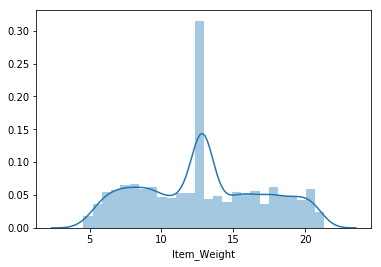

In [20]:
sns.distplot(df['Item_Weight'])
plt.show()

E:\New folder\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


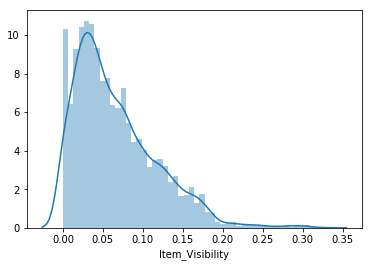

In [21]:
sns.distplot(df['Item_Visibility'])
plt.show()

E:\New folder\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


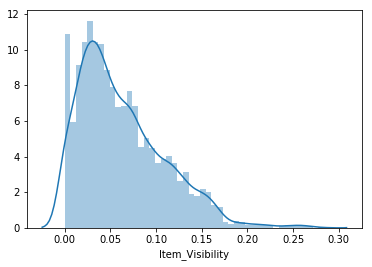

In [22]:
df['Item_Visibility']=np.log(1+df['Item_Visibility'])
sns.distplot(df['Item_Visibility'])

E:\New folder\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


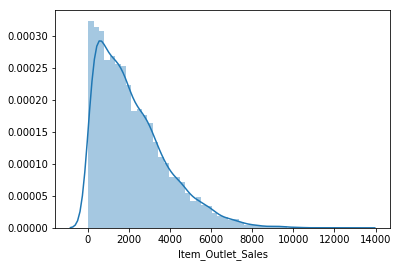

In [23]:
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

E:\New folder\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


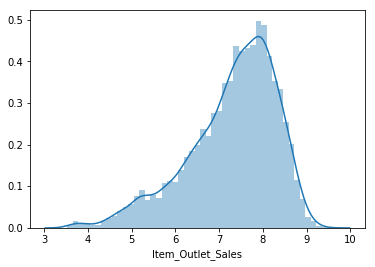

In [24]:
df['Item_Outlet_Sales']=np.log(1+df['Item_Outlet_Sales'])
sns.distplot(df['Item_Outlet_Sales'])

## Let's plots categorical data

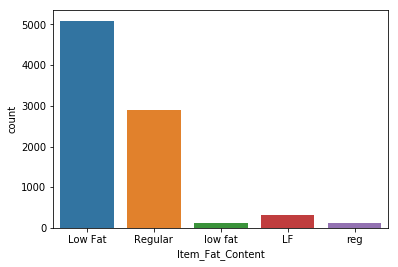

In [25]:
sns.countplot(df['Item_Fat_Content'])

[Text(0,0,'Dairy'),
 Text(0,0,'Soft Drinks'),
 Text(0,0,'Meat'),
 Text(0,0,'Fruits and Vegetables'),
 Text(0,0,'Household'),
 Text(0,0,'Baking Goods'),
 Text(0,0,'Snack Foods'),
 Text(0,0,'Frozen Foods'),
 Text(0,0,'Breakfast'),
 Text(0,0,'Health and Hygiene'),
 Text(0,0,'Hard Drinks'),
 Text(0,0,'Canned'),
 Text(0,0,'Breads'),
 Text(0,0,'Starchy Foods'),
 Text(0,0,'Others'),
 Text(0,0,'Seafood')]

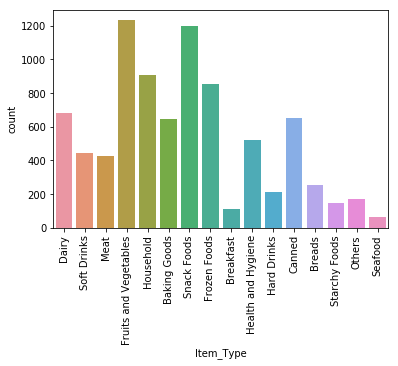

In [26]:
label=list(df['Item_Type'].unique())
chart=sns.countplot(df['Item_Type'])
chart.set_xticklabels(labels=label,rotation=90)

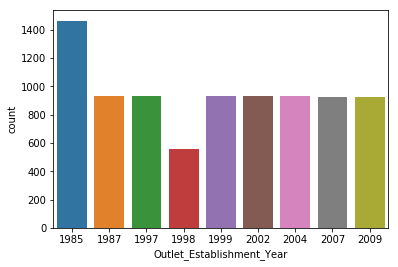

In [27]:
sns.countplot(df['Outlet_Establishment_Year'])

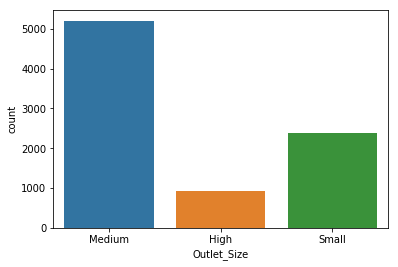

In [28]:
sns.countplot(df['Outlet_Size'])

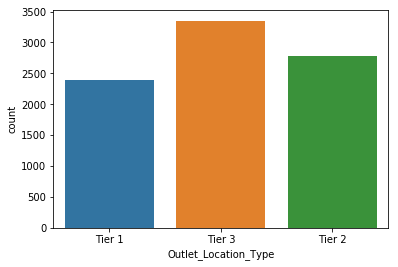

In [29]:
sns.countplot(df['Outlet_Location_Type'])

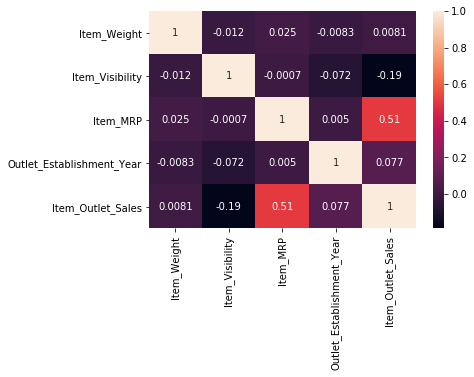

In [30]:
# coorelation matrix

corr=df.corr()
sns.heatmap(corr,annot=True)

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

## Label Encoding

In [32]:
df['Item_Fat_Content']= le.fit_transform(df['Item_Fat_Content'])
df['Item_Type']= le.fit_transform(df['Item_Type'])
df['Outlet_Size']= le.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type']= le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type']= le.fit_transform(df['Outlet_Type'])


In [33]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300000,1,0.015920,4,249.8092,1999,1,0,1,8.225808
1,5.920000,2,0.019095,14,48.2692,2009,1,2,2,6.096776
2,17.500000,1,0.016621,10,141.6180,1999,1,0,1,7.648868
3,19.200000,2,0.000000,6,182.0950,1998,1,2,0,6.597664
4,8.930000,1,0.000000,9,53.8614,1987,0,2,1,6.903451
5,10.395000,2,0.000000,0,51.4008,2009,1,2,2,6.323658
6,13.650000,2,0.012661,13,57.6588,1987,0,2,1,5.842247
7,12.857645,1,0.119976,13,107.7622,1985,1,2,3,8.299973
8,16.200000,2,0.016549,5,96.9726,2002,1,1,1,6.982490
9,19.200000,2,0.090252,5,187.8214,2007,1,1,1,8.457769


## Onehot Encoding

In [34]:
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])
df.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,9.30,0.015920,4,249.8092,1999,8.225808,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019095,14,48.2692,2009,6.096776,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016621,10,141.6180,1999,7.648868,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,6,182.0950,1998,6.597664,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,9,53.8614,1987,6.903451,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0


In [35]:
X=df.drop('Item_Outlet_Sales',axis=1)
Y=df['Item_Outlet_Sales']

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)

# Standarization

In [37]:
X.describe()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.062904,7.226681,140.992782,1997.831867,0.037076,0.597090,0.338965,0.013141,0.013728,0.109351,0.610466,0.280183,0.280183,0.326763,0.393054,0.127068,0.654347,0.108882,0.109703
std,4.226124,0.047218,4.209990,62.275067,8.371760,0.188960,0.490512,0.473386,0.113885,0.116365,0.312098,0.487673,0.449115,0.449115,0.469057,0.488457,0.333069,0.475609,0.311509,0.312538
min,4.555000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.310000,0.026632,4.000000,93.826500,1987.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.857645,0.052527,6.000000,143.012800,1999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,16.000000,0.090376,10.000000,185.643700,2004.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,21.350000,0.283968,15.000000,266.888400,2009.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [39]:
X_train_std=sc.fit_transform(X_train)

In [40]:
X_test_std=sc.transform(X_test)

In [41]:
X_train_std

array([[ 1.52290029,  0.71430032, -0.75847359, ...,  0.73160085,
        -0.34892775, -0.35759513],
       [-1.23985603, -0.07371896,  1.60759199, ...,  0.73160085,
        -0.34892775, -0.35759513],
       [ 1.54667616,  0.01541724,  0.66116576, ...,  0.73160085,
        -0.34892775, -0.35759513],
       ...,
       [-0.08197107, -0.93955001,  0.18795264, ...,  0.73160085,
        -0.34892775, -0.35759513],
       [-0.74888428,  1.23254718, -1.70489982, ...,  0.73160085,
        -0.34892775, -0.35759513],
       [ 0.67885683,  1.82948563,  0.4245592 , ..., -1.36686554,
         2.8659228 , -0.35759513]])

In [42]:
X_test_std

array([[-0.43860915, -0.19860421,  0.18795264, ..., -1.36686554,
         2.8659228 , -0.35759513],
       [ 1.22570189, -0.52562561,  1.37098543, ...,  0.73160085,
        -0.34892775, -0.35759513],
       [-1.21845775,  0.19016747, -1.46829326, ...,  0.73160085,
        -0.34892775, -0.35759513],
       ...,
       [ 0.65508096,  0.90541099,  0.89777232, ..., -1.36686554,
        -0.34892775, -0.35759513],
       [ 1.01171904, -1.33461953,  0.4245592 , ..., -1.36686554,
         2.8659228 , -0.35759513],
       [-1.56558548, -1.12645032,  0.66116576, ...,  0.73160085,
        -0.34892775, -0.35759513]])

In [43]:
Y_train

3684    5.104653
1935    7.382896
5142    7.320550
4978    7.487366
2299    8.177245
1041    8.172745
5438    6.946637
425     8.638287
7873    4.646303
1663    8.177993
3471    7.675173
7528    7.975638
1138    8.919088
5170    7.214675
1373    8.599192
1472    7.654564
1493    6.481299
534     7.895624
7072    5.818786
2670    7.385377
4139    5.979275
5694    7.269940
6816    7.781785
6145    5.580946
3113    5.302011
1350    5.914905
2502    6.241573
6613    7.220536
6602    7.308135
5013    7.202849
          ...   
7742    6.860412
6383    8.518489
6249    6.430032
3807    8.023453
5758    7.832168
2323    7.900077
1273    6.294582
5538    7.171125
2107    8.725559
2931    5.285288
1949    7.242213
4467    8.139501
49      6.660982
4573    7.483630
7173    7.416681
3182    7.041860
5824    8.187666
6460    7.425447
5032    7.347073
2623    7.060892
5764    8.106520
5672    8.301131
973     4.821676
4079    8.281772
6141    8.403321
599     8.613201
5695    7.270867
8006    7.6819

In [44]:
Y_test

8179    6.808843
8355    7.936193
3411    7.574797
7089    6.772925
6954    7.804310
6986    5.159676
2512    7.229263
6395    7.962971
8094    4.766566
1004    7.434138
7499    5.516157
4017    6.292121
3387    7.256877
2497    6.498488
5789    6.318870
7249    7.512409
5948    3.876848
6573    5.178616
7091    7.967827
1125    7.677026
519     8.583987
2068    8.017983
3564    7.419478
1439    7.717533
1421    7.773415
8201    9.147554
4896    8.427498
2412    8.485914
7730    5.178616
1963    7.665858
          ...   
7611    7.163936
5143    5.824703
4480    8.242420
1544    8.134828
3090    7.840848
5533    7.688681
3165    7.762146
3106    7.769204
288     8.623431
3811    5.378603
7197    7.718126
1814    5.763894
7380    8.466492
504     7.964592
3947    7.467784
3000    7.671458
7413    7.458615
7122    7.243642
1971    8.524059
5451    7.034849
4387    7.858499
6818    8.706568
8089    8.104309
5657    6.709224
6093    8.249058
1317    7.451296
4996    6.819808
531     5.9167

# Model Building

In [45]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [46]:
lr.fit(X_train_std,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
X_test.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
8179,11.00,0.053695,8,100.3358,2009,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
8355,18.00,0.038238,13,148.6418,1987,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
3411,7.72,0.072071,1,77.5986,1997,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0
7089,20.70,0.047870,6,39.9506,2007,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
6954,7.55,0.026861,3,152.9340,2002,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0


In [48]:
Y_pred_lr=lr.predict(X_test)

In [49]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [50]:
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

-5.048823926502751e+25
7187226201988.398
7217175394669.712


In [51]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000)

In [52]:
rf.fit(X_train_std,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [53]:
Y_pred_rf= rf.predict(X_test_std)

In [54]:
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

0.7027551870622544
0.42866561836795547
0.5537698278620391


# Hyper Parameter Tuning

In [55]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train_std, Y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    7.3s remaining:    7.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   36.0s finished


Best: 0.704 using {'n_estimators': 1000}
0.680 (0.000) with: {'n_estimators': 10}
0.702 (0.000) with: {'n_estimators': 100}
0.704 (0.002) with: {'n_estimators': 1000}


In [56]:
grid_search_forest.best_params_

{'n_estimators': 1000}

In [57]:
grid_search_forest.best_score_

0.703881811993871

In [58]:
Y_pred_rf_grid=grid_search_forest.predict(X_test_std)

In [59]:
r2_score(Y_test,Y_pred_rf_grid)

0.7031657266093465

# Save your model 

In [60]:
!pip install joblib

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [61]:
import joblib

In [62]:
joblib.dump(grid_search_forest,r"E:\BigMart_Data\models\random_forest_grid.sav")

['E:\\BigMart_Data\\models\\random_forest_grid.sav']

In [63]:
model=joblib.dump(grid_search_forest,r"E:\BigMart_Data\models\random_forest_grid.sav")